In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
music_df=pd.read_csv('../data/mlc_data.csv')

In [29]:
music_df = music_df.rename(columns={'If ': 'ISRC'})

In [30]:
music_df["ISRC"].fillna(" ", inplace = True)
music_df["Country Code"].fillna(" ", inplace = True)
music_df["Registrant Code"].fillna(" ", inplace = True)
music_df["Year of Reference"].fillna(" ", inplace = True)
music_df["Usage Period"].fillna(" ", inplace = True)
music_df["Streaming Platform (DSP)"].fillna(" ", inplace = True)
music_df["Streams"].fillna(" ", inplace = True)
music_df["Recording Artist"].fillna(" ", inplace = True)
music_df["Recording Label"].fillna(" ", inplace = True)
music_df["Recording Title"].fillna(" ", inplace = True)
music_df["Release Title"].fillna(" ", inplace = True)
music_df["Recording Duration (Seconds)"].fillna(" ", inplace = True)

In [31]:
music_df=music_df.set_axis(["ISRC","Country","Registrant","Year","UsePeriod","Platform","Streams","Artist","Label","RecordingName","ReleaseName","Length","ListsWriters"], axis=1)


In [32]:
music_df

,ISRC,Country,Registrant,Year,UsePeriod,Platform,Streams,Artist,Label,RecordingName,ReleaseName,Length,ListsWriters
0,USUG12101043,US,UG1,21.0,,AudioMack,"10,175",Future,,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,,SoundCloud,"8,597",LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,,SoundCloud,"261,280",LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,,AudioMack,"62,105",Foolio,,WHEN I SEE YOU REMIX,#unknown#,187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,QZK6F2019397,QZ,K6F,20.0,3/1/2021,Spotify,"28,549",Myuk,Sony Music Labels Inc.,魔法 - Anime Size,魔法 (Anime Size),89,1
99996,QZK6F2019397,QZ,K6F,20.0,3/1/2021,Spotify,"28,941",yama,Sony Music Labels Inc.,麻痺,麻痺,199,1
99997,SE6HN1926755,SE,6HN,19.0,3/1/2021,Spotify,"28,941",yama,Sony Music Labels Inc.,麻痺,麻痺,199,1
99998,SEYOK1669274,SE,YOK,16.0,3/1/2021,Apple,"8,970",yama,Sony Music Labels Inc.,麻痺,麻痺 - Single,198,1


In [33]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ISRC           100000 non-null  object
 1   Country        100000 non-null  object
 2   Registrant     100000 non-null  object
 3   Year           100000 non-null  object
 4   UsePeriod      100000 non-null  object
 5   Platform       100000 non-null  object
 6   Streams        100000 non-null  object
 7   Artist         100000 non-null  object
 8   Label          100000 non-null  object
 9   RecordingName  100000 non-null  object
 10  ReleaseName    100000 non-null  object
 11  Length         100000 non-null  int64 
 12  ListsWriters   100000 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 9.9+ MB


In [34]:
music_df.isnull().sum()

ISRC             0
Country          0
Registrant       0
Year             0
UsePeriod        0
Platform         0
Streams          0
Artist           0
Label            0
RecordingName    0
ReleaseName      0
Length           0
ListsWriters     0
dtype: int64

In [35]:
music_df['Streams'] = music_df['Streams'].astype(str)
music_df['Streams']=music_df['Streams'].str.replace(',','')
music_df['Streams'] = music_df['Streams'].astype(int)

In [36]:
test=music_df.loc[(music_df['Label']==' ')] #testing the difference between '' and ' ' -> I need to use ' ' to find blanks
test.head()

,ISRC,Country,Registrant,Year,UsePeriod,Platform,Streams,Artist,Label,RecordingName,ReleaseName,Length,ListsWriters
0,USUG12101043,US,UG1,21.0,,AudioMack,10175,Future,,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
4,USAT22007048,US,AT2,20.0,,AudioMack,62105,Foolio,,WHEN I SEE YOU REMIX,#unknown#,187,0
138,USUYG1360358,US,UYG,13.0,4/1/2021,Deezer,2,Unknown,,{Cartagena},Silvestre Dangond - Grandes Éxitos,356461,0
139,USUM72105617,US,UM7,21.0,4/1/2021,Deezer,2,Unknown,,{Esa Mujer},Silvestre Dangond - Grandes Éxitos,356461,0
140,USAT22007802,US,AT2,20.0,5/1/2021,Deezer,2,Unknown,,{Esa Mujer},Silvestre Dangond - Grandes Éxitos,356461,0


In [37]:
platformstreams=music_df.groupby(['Platform'], as_index=False).agg({'Streams':'sum'})
print(platformstreams.head())

    Platform       Streams
0             4.703908e+07
1     Amazon  1.511998e+08
2    Anghami  3.468200e+04
3      Apple  1.606454e+09
4  AudioMack  1.199156e+07


In [38]:
topdsps=platformstreams[platformstreams['Platform'].isin(['Apple','Pandora','Spotify','Amazon'])]
topdsps.sort_values(by='Streams', ascending=False)

,Platform,Streams
23,Spotify,2.552564e+09
3,Apple,1.606454e+09
16,Pandora,8.742366e+08
1,Amazon,1.511998e+08


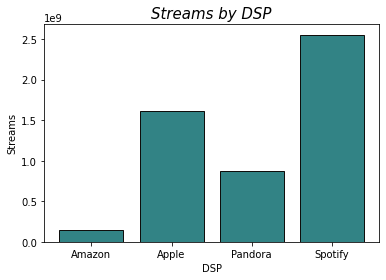

In [39]:
plt.bar(topdsps.Platform, topdsps.Streams, color="#328385", edgecolor="#0f0e0c")
plt.xlabel('DSP')
plt.ylabel('Streams')
plt.title(label='Streams by DSP', fontsize=15, fontstyle='oblique')
plt.show()

In [43]:
platform_streams = music_df.groupby(['Platform'], as_index=False).agg({'Streams':'sum'})
print(platform_streams.head())

    Platform       Streams
0             4.703908e+07
1     Amazon  1.511998e+08
2    Anghami  3.468200e+04
3      Apple  1.606454e+09
4  AudioMack  1.199156e+07


In [44]:
Year = platform_streams[platform_streams['Platform'].isin(['Apple','AudioMack','Spotify','Amazon'])]
Year.sort_values(by='Streams', ascending=False)

,Platform,Streams
23,Spotify,2.552564e+09
3,Apple,1.606454e+09
1,Amazon,1.511998e+08
4,AudioMack,1.199156e+07


In [49]:
plt.hist(year, bins=40)
plt.show

NameError: name 'year' is not defined